# Task-1 Regression

Task1-Regression: Prediction of Property Resale Prices – given the information about a property (e.g., size, #rooms, location), your task is to predict its price based. This regression task is implemented as a Kaggle InClass Competition.

## Setting Up the NoteBook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/train.csv')
data = data.drop(['elevation', 'floor_level', 'listing_id', 'title', 'property_details_url'], axis=1)
data.head()

,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,furnishing,available_unit_types,total_num_units,lat,lng,subzone,planning_area,price
0,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,unspecified,NaN,116.0,1.414399,103.837196,yishun south,yishun,514500.0
1,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,unspecified,"1, 2, 3, 4, 5, 6 br",NaN,1.372597,103.875625,serangoon north,serangoon,995400.0
2,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,partial,"studio, 3, 4, 5, 6 br",56.0,1.298773,103.895798,mountbatten,marine parade,8485000.0
3,26 leedon heights,leedon green,Condo,freehold,2023.0,3.0,2.0,958,partial,"studio, 1, 2, 3, 4 br",638.0,1.312364,103.803271,farrer court,bukit timah,2626000.0
4,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,unspecified,"studio, 1, 2, 3, 4, 5 br",351.0,1.273959,103.843635,anson,downtown core,1764000.0


## Data Cleaning And EDA Process

In [3]:
print('Before cleaning, there are {} records.'.format(data.shape[0]))
data.isnull().sum()

Before cleaning, there are 20254 records.


address                    0
property_name              0
property_type              0
tenure                  1723
built_year               922
num_beds                  80
num_baths                434
size_sqft                  0
furnishing                 0
available_unit_types    1441
total_num_units         5652
lat                        0
lng                        0
subzone                  113
planning_area            113
price                      0
dtype: int64

In [11]:
data[['built_year', 'num_beds', 'num_baths']] = data[['built_year', 'num_beds', 'num_baths']].fillna(data[['built_year', 'num_beds', 'num_baths']].mean())
data['available_unit_types'] = data['available_unit_types'].fillna(data['available_unit_types'].mode()[0])
data['tenure'] = data['tenure'].fillna(data['tenure'].mode()[0])
data = data[(data['size_sqft'] <= data['size_sqft'].quantile(0.99)) & (data['size_sqft'] > 10)]

In [12]:
print('After cleaning, there are now {} records.'.format(data.shape[0]))
data.isnull().sum()

After cleaning, there are now 19698 records.


address                    0
property_name              0
property_type              0
tenure                     0
built_year                 0
num_beds                   0
num_baths                  0
size_sqft                  0
furnishing                 0
available_unit_types       0
total_num_units         5243
lat                        0
lng                        0
subzone                  113
planning_area            113
price                      0
dtype: int64

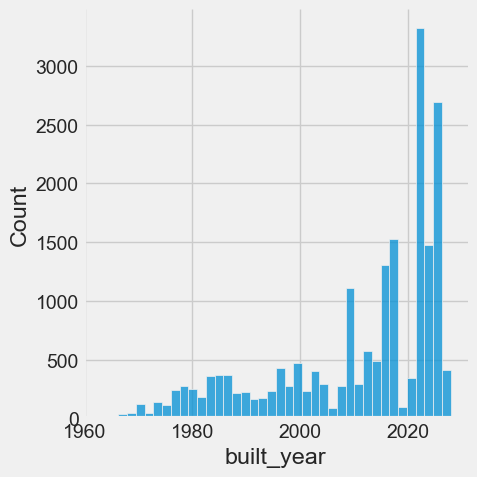

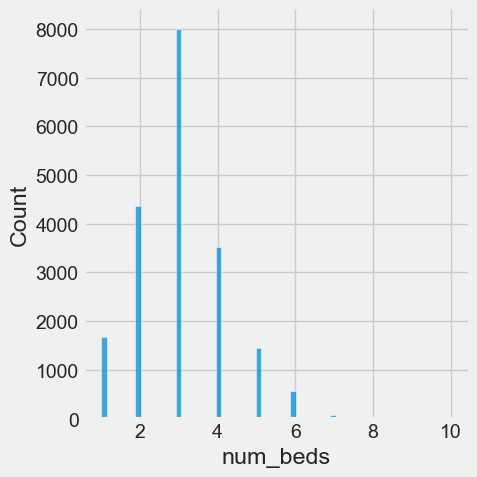

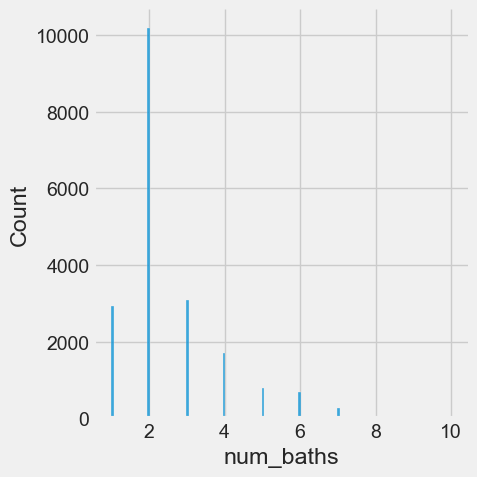

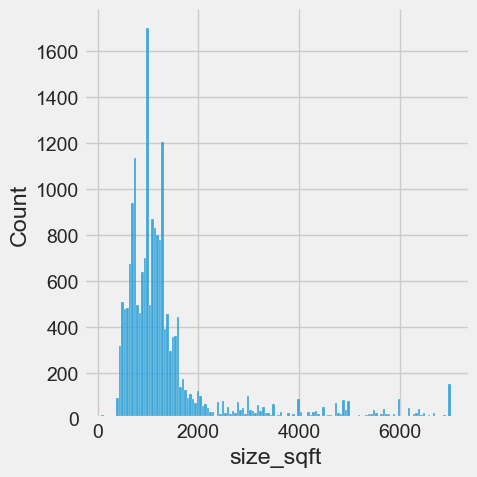

In [13]:
data['built_year'] = data['built_year'].astype(int)
data['num_baths'] = data['num_baths'].astype(int)
data['num_beds'] = data['num_beds'].astype(int)
sns.displot(data, x="built_year")
sns.displot(data, x="num_beds")
sns.displot(data, x="num_baths")
sns.displot(data, x="size_sqft")

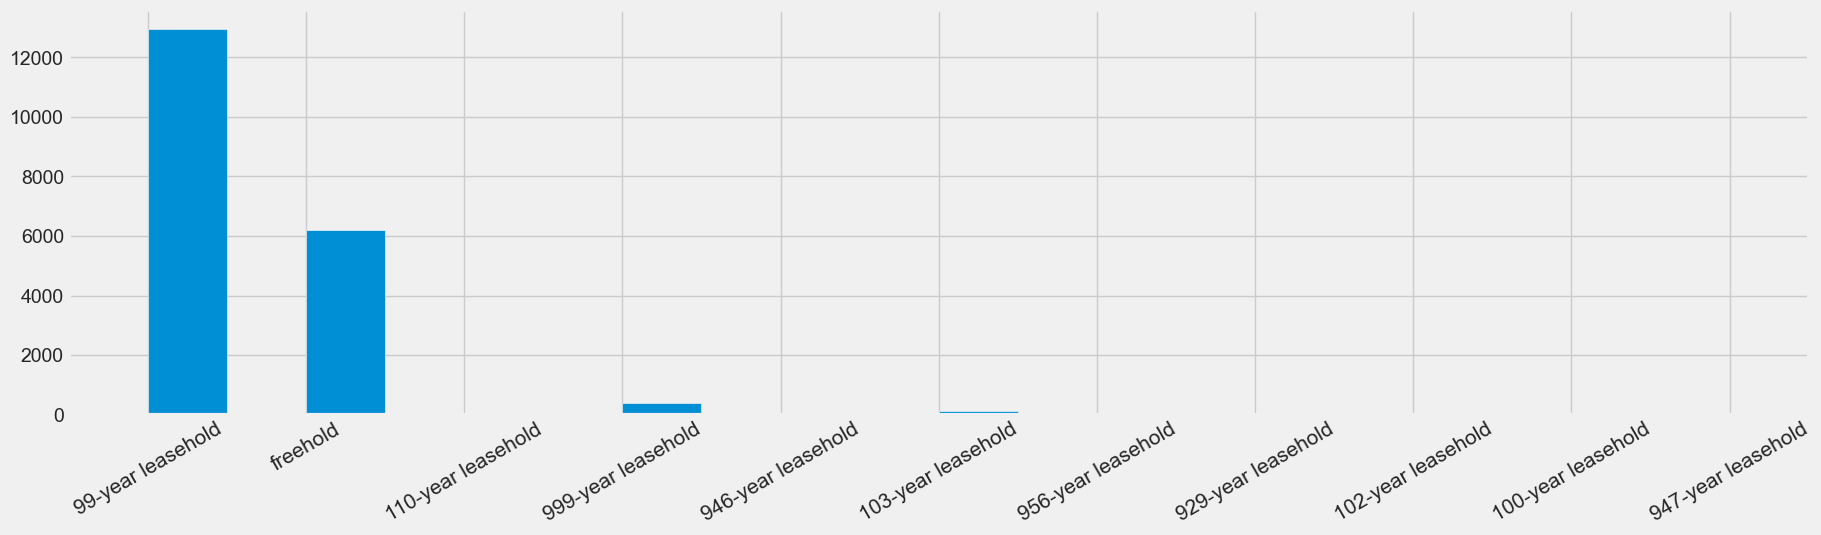

In [23]:
data = data.astype({'tenure':'string'})
plt.figure(figsize=(20,5),)
plt.tick_params(axis='x', labelsize=15)
plt.xticks(rotation=30)
plt.hist(data.tenure, bins=20)
plt.show()

In [ ]:
print('After cleaning, there are now {} records.'.format(data.shape[0]))